## Import libraries

In [3]:
# imports from custom library
import sys
sys.path.append('../../')
import matplotlib.pyplot as plt
plt.rc('text', usetex=True)
from mlrefined_libraries import convnets_library as convlib
from mlrefined_libraries import basics_library as baslib
from mlrefined_libraries import superlearn_library as superlearn
from mlrefined_libraries import multilayer_perceptron_library as network_lib

import autograd.numpy as np
from autograd.util import flatten_func
from autograd import grad as compute_grad   

import autograd.numpy as np
import pandas as pd
import cv2
import csv
import pickle
import glob
import time
import copy

#this is needed to compensate for matplotlib notebook's tendancy to blow up images when plotted inline
%matplotlib notebook
from matplotlib import rcParams
rcParams['figure.autolayout'] = True

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Testing out backend 

## regression example

<IPython.core.display.Javascript object>


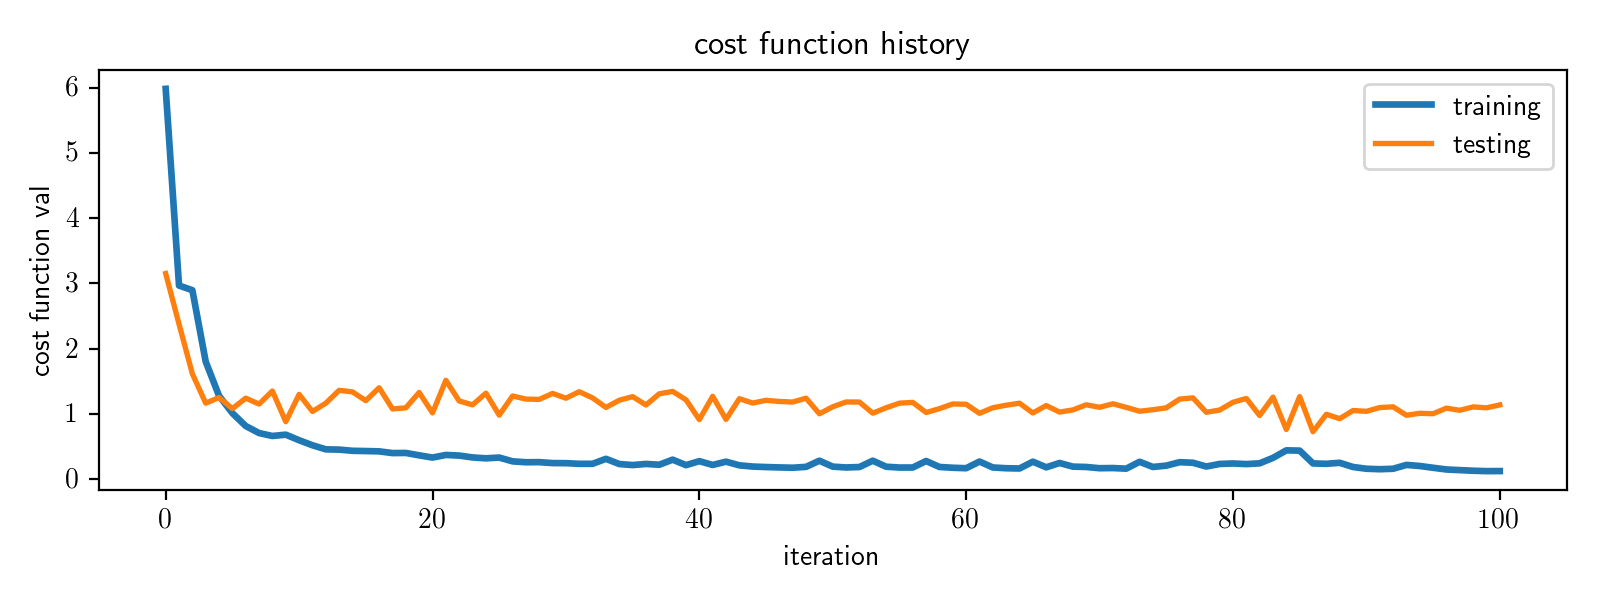

In [4]:
# load data
datapath = '../../mlrefined_datasets/superlearn_datasets/'
csvname = datapath + 'noisy_sin_sample.csv'
data = np.loadtxt(csvname,delimiter = ',')

# initialize
demo = network_lib.network_learner.Network()

# load in data - for this one split up training and testing
ind = np.random.permutation(len(data))
data_train = data[ind[:-7],:]
data_test = data[ind[-7:],:]
demo.input_data(data_train,data_test,normalize = True)

# choose cost function
demo.choose_cost(cost_name = 'least_squares')

# setup network architecture
activation_name = 'maxout'
layer_sizes = [1,10,10,10,10,10,1]
demo.architecture_settings(activation_name,layer_sizes)

# setup optimizer
demo.optimizer_settings(alpha = 10**(-3),max_its = 100,version = 'unnormalized',scale = 0.1)

# fit
demo.fit(verbose = True)

# compute cost plots on training and testing data
demo.compute_cost_plots()

# produce cost functio plots for training and testing data
demo.plot_histories(start = 0)

## two-class classification

<IPython.core.display.Javascript object>


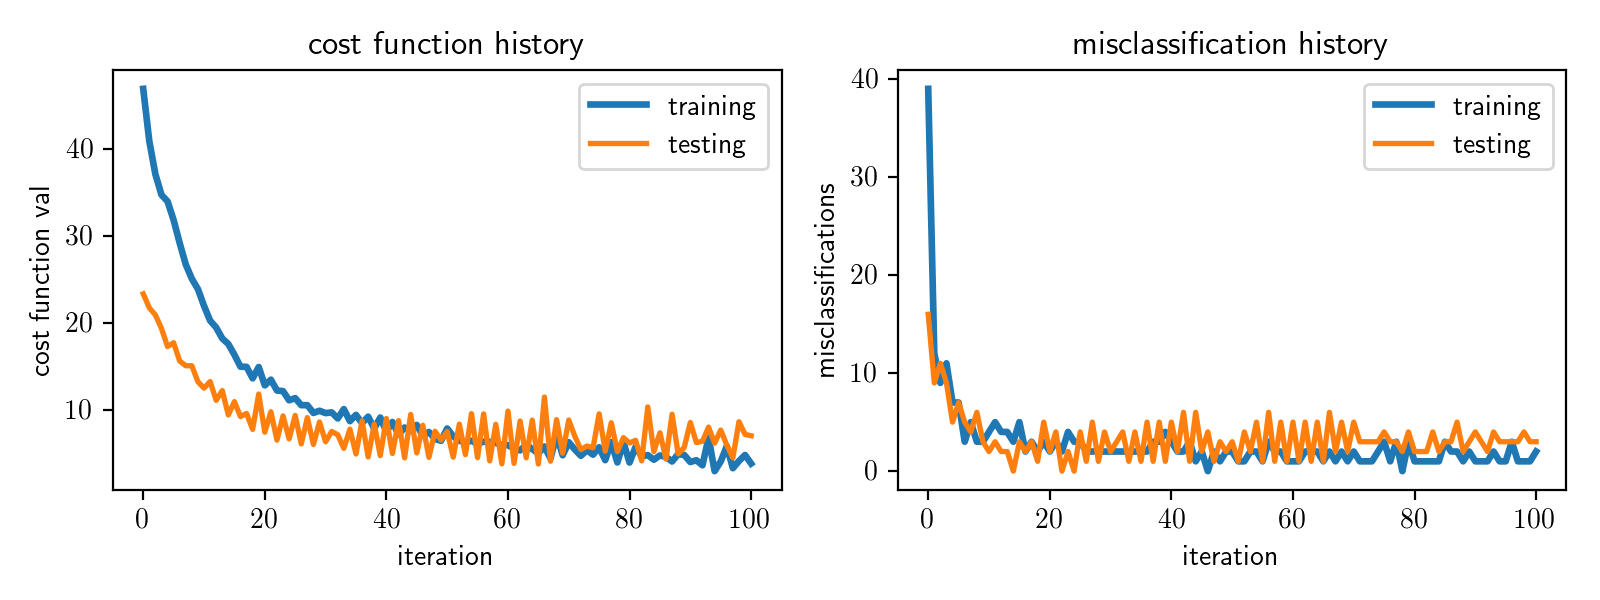

In [29]:
demo = network_lib.network_learner.Network()

# load in dataset
data = np.loadtxt('../../mlrefined_datasets/superlearn_datasets/3d_classification_data_v0.csv',delimiter = ',')

# load in data - for this one split up training and testing
ind = np.random.permutation(len(data))
data_train = data[ind[:-33],:]
data_test = data[ind[-33:],:]
demo.input_data(data_train,data_test,normalize = True)

# choose cost function
demo.choose_cost(cost_name = 'twoclass_softmax')

# setup network architecture
activation_name = 'maxout'
layer_sizes = [2,10,10,10,10,10,1]
demo.architecture_settings(activation_name,layer_sizes)

# setup optimizer
demo.optimizer_settings(alpha = 10**(-1),max_its = 100,version = 'normalized',scale = 0.1)

# fit
demo.fit(verbose = True)

# compute cost plots on training and testing data
demo.compute_cost_plots()

# produce cost functio plots for training and testing data
demo.plot_histories(start = 0)

## multi-class classification dataset

<IPython.core.display.Javascript object>


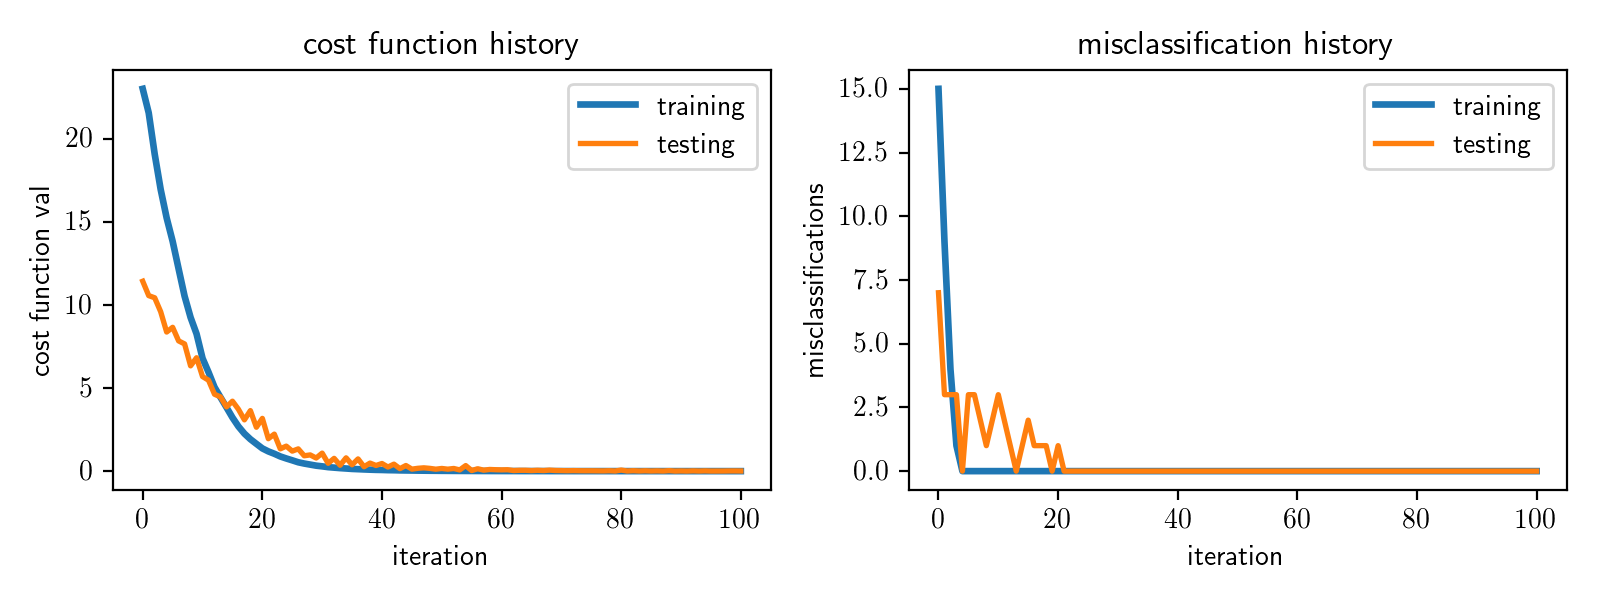

In [31]:
data = np.loadtxt('../../mlrefined_datasets/superlearn_datasets/3class_data.csv',delimiter = ',')
x = data[:,-1]
y = data[:,-1:]
y = np.asarray([int(v) - 1 for v in y])[:,np.newaxis]
data = np.concatenate((x,y),axis = 1)

demo = network_lib.network_learner.Network()

# load in data - for this one split up training and testing
ind = np.random.permutation(len(data))
data_train = data[ind[:-10],:]
data_test = data[ind[-10:],:]

demo.input_data(data_train,data_test,normalize = True)

# choose cost function
demo.choose_cost(cost_name = 'multiclass_softmax')

# setup network architecture
activation_name = 'maxout'
layer_sizes = [2,10,10,10,10,10,3]
demo.architecture_settings(activation_name,layer_sizes)

# setup optimizer
demo.optimizer_settings(alpha = 10**(-1),max_its = 100,version = 'normalized',scale = 0.1)

# fit
demo.fit(verbose = True)

# compute cost plots on training and testing data
demo.compute_cost_plots()

# produce cost functio plots for training and testing data
demo.plot_histories(start = 0)

# MNIST sample set

In [48]:
# load in dataset
datapath = '../../../../../Desktop/mnist/'
data = np.loadtxt(datapath + 'mnist_mini_train.csv',delimiter = ',')

# our normalization function
def de_contrast(data):
    data_means = np.mean(data,axis = 0)
    data = data - data_means
    data_stds = np.std(data,axis = 0)
    data = data/data_stds
    return data

# normalize the input 
x = data[:,:-1]
y = data[:,-1:]
x_decontrast = de_contrast(x.T).T

In [50]:
data = np.concatenate((x_decontrast,y),axis = 1)
data_train = data[:4000,:]
data_test = data[4000:,:]

<IPython.core.display.Javascript object>


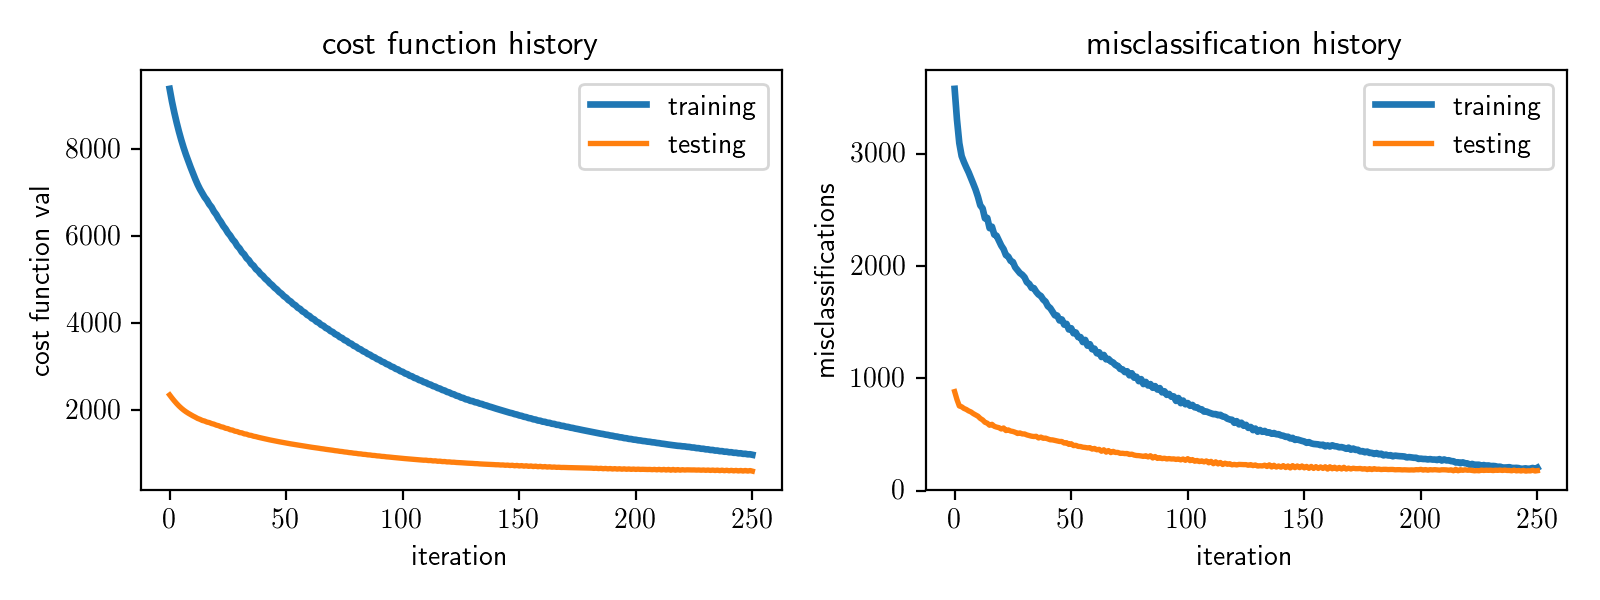

In [57]:
demo.input_data(data_train,data_test,normalize = True)

# choose cost function
demo.choose_cost(cost_name = 'multiclass_softmax')

# setup network architecture
activation_name = 'maxout'
layer_sizes = [784,10,10,10,10,10,10]
demo.architecture_settings(activation_name,layer_sizes)

# setup optimizer
demo.optimizer_settings(alpha = 10**(-1),max_its = 250,version = 'normalized',scale = 0.1)

# fit
demo.fit(verbose = True)

# compute cost plots on training and testing data
demo.compute_cost_plots()

# produce cost functio plots for training and testing data
demo.plot_histories(start = 0)